<a href="https://colab.research.google.com/github/denniesbor/TwitterPython/blob/RawNotebooks/TopicModelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Topic Modeling

A topic model is a statistical model for discovering the abstract "topics" that occur in a collection of documents.
In this tutorial, we will compare the conventional method, LDA and BERT based models.

### 1. Latent Dirichlet Allocation (LDA)
LDA topic modelling discovers hidden (latent) topics in text documents. It does this by inferring possible topics based on the words in the documents using a generative probabilistic model and Dirichlet distributions.
LDA allows us to efficiently analyze large volumes of text by clustering documents into topics.

LDA makes the following assumptions:

1. Documents are probability distributions over topics.
2. Topics are probability distributions over words.

We will use pyLDA, a library designed to help users interpret the topics in a topic model that has been fit to a corpus of text data.

In [ ]:
# install pyLDAvis
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 13.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=5a6fcbaa0c55263c908f3385e1de1e4145af9de68a816d3e3d7cc6df93e723c3
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [ ]:
# import libraries
import pandas as pd 
import re
from wordcloud import wordcloud 
import matplotlib.pyplot as plt 

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation 

import pyLDAvis 
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

import warnings
warnings.filterwarnings("ignore")


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [ ]:
# load data

df = pd.read_csv('/content/drive/MyDrive/Summer2022/kenya_all_data_clean.csv')

### Text Pre-Processing

We will transform tweet data into a vector based on each word's frequency (count) in the entire text corpus. We will only consider tweets that appear in less than 90% of the documents and at least five documents. This is to avoid words specific to a document or words that appear in all documents as they will not be valuable in topic discovery.

In [ ]:
cv = CountVectorizer(max_df=0.9,min_df=5,stop_words='english')

### Document Term Matrix

A document-term matrix is a mathematical matrix that describes the frequency of terms in a collection of documents. In a document-term matrix, rows correspond to documents in the collection, and columns correspond to terms.

In [ ]:
dtm = cv.fit_transform(df['tweet_text'])
dtm

<13950x2514 sparse matrix of type '<class 'numpy.int64'>'
	with 52073 stored elements in Compressed Sparse Row format>

In [ ]:
# LDA

%%time

# Assign number of topics
topics = 3

# Define model
LDA = LatentDirichletAllocation(n_components=topics,random_state=42)

# Fit model
LDA.fit(dtm)


CPU times: user 26.9 s, sys: 1.17 ms, total: 26.9 s
Wall time: 31.3 s


In [ ]:
# Sample 1 topic

single_topic = LDA.components_[0]

# Order word distribution in topic 0 and get top ten words

topic_words = 10
top_words = single_topic.argsort()[-topic_words:]

for index in top_words:
  print(cv.get_feature_names()[index])

think
vote
thing
make
ruto
people
time
don
come
know


In [ ]:
# Assign number of words
word_count = 15

# For loop to print top 15 words for 3 topics
for i,topic in enumerate(LDA.components_):
  print("The top  {word_count} word for topic # {i} is:".format(word_count=word_count,i=i))
  print([cv.get_feature_names()[index] for index in topic.argsort()[-word_count:]])
  print('\n')
  print('\n')

The top  15 word for topic # 0 is:
['tell', 'crippleswalkingglobally', 'azimio', 'ni', 'raila', 'think', 'vote', 'thing', 'make', 'ruto', 'people', 'time', 'don', 'come', 'know']




The top  15 word for topic # 1 is:
['game', 'kenya', 'life', 'god', 'say', 'today', 'post', 'man', 'look', 'day', 'let', 'win', 'like', 'good', 'just']




The top  15 word for topic # 2 is:
['miss', 'team', 'arsenal', 'man', 'guy', 'true', 'na', 'bro', 'woman', 'help', 'ke', 'kenya', 'love', 'follow', 'thank']






### LDA Output Interpretation

1. The words in topic 0 are associated with religion, and we can conclude the discussion is about religious events.

2. Topic 1 is about politics as it comprises the names of the key politicians in Kenya. 

3. From the words(congratulations, arsenal, and game) in topic 2, we can infer the topic is about soccer.

In [ ]:
# Assign topics to dtm

topic_results = LDA.transform(dtm)
topic_results.shape

(13950, 3)

In [ ]:
# check topic distribution

topic_results[0].round(2)

array([0.94, 0.03, 0.03])

In [ ]:
# Assign the most probable topic to the document
df['topic'] = topic_results.argmax(axis=1)

df.head(4)

,tweet_id_str,date_time,location,tweet_text,length_tweet,topic
0,1525264578468364290,2022-05-13 23:59:48+00:00,Kenya,mr sherehe eldoret for a joemfalmelive party a...,95,0
1,1525264548298731520,2022-05-13 23:59:41+00:00,Kenya,mr sherehe eldoret for a joemfalmelive party a...,95,0
2,1525264538530156544,2022-05-13 23:59:38+00:00,Misitu Raha (Achi's Ranch),feel a little horny when call breast instead o...,52,2
3,1525264505005015042,2022-05-13 23:59:30+00:00,Kenya,mr sherehe eldoret for a joemfalmelive party a...,95,0


In [ ]:
# model visualization with pyLDAvis
pyLDAvis.sklearn.prepare(LDA, dtm, cv)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.124770  0.206142       1        1  35.470018
1     -0.125018 -0.206006       2        1  34.144026
2      0.249788 -0.000136       3        1  30.385956, topic_info=       Term        Freq       Total Category  logprob  loglift
1149   just  493.000000  493.000000  Default  30.0000  30.0000
903    good  468.000000  468.000000  Default  29.0000  29.0000
1218   know  381.000000  381.000000  Default  28.0000  28.0000
2222  thank  245.000000  245.000000  Default  27.0000  27.0000
2457    win  277.000000  277.000000  Default  26.0000  26.0000
...     ...         ...         ...      ...      ...      ...
1361    man  100.535743  326.168438   Topic3  -5.0870   0.0143
1285   like   81.344034  361.427138   Topic3  -5.2988  -0.3002
2234  think   68.770079  217.533087   Topic3  -5.4668   0.0396
1534   need   67.479894  217.274794   Topic3  -5.4857   0.0219
2402   want   61.349329  202.738634   Topic3  -5.5810  -0.0041

[181 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
36        2  0.989284      254
54        1  0.990764      5th
76        3  0.984852  account
111       2  0.981932    agree
136       3  0.994309  amazing
...     ...       ...      ...
2471      3  0.919793    woman
2487      3  0.986919    wrong
2501      3  0.973280     yeah
2504      1  0.987895      yes
2504      3  0.009320      yes

[242 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

### Topic Visualization

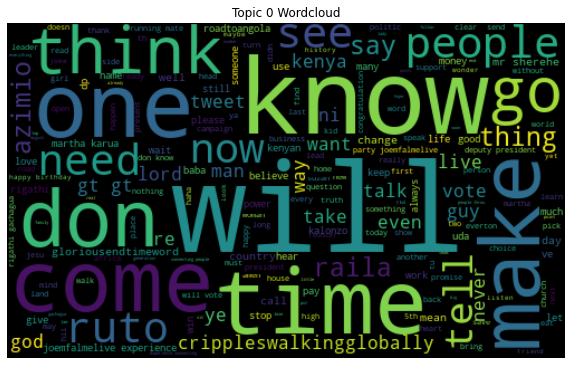

In [ ]:
# topic zero

topic0 = df[df['topic']==0]
all_words = ' '.join(twts for twts in topic0['tweet_text'])

text_cloud = wordcloud.WordCloud(height=300,width=500,random_state=10,max_font_size=110).generate(all_words)

plt.figure(figsize=(10,8))
plt.title('Topic 0 Wordcloud')
plt.imshow(text_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

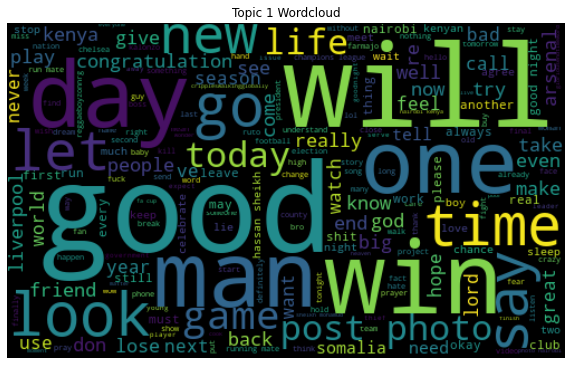

In [ ]:
# topic one

topic1 = df[df['topic']==1]
all_words = ' '.join(twts for twts in topic1['tweet_text'])

text_cloud = wordcloud.WordCloud(height=300,width=500,random_state=10,max_font_size=110).generate(all_words)

plt.figure(figsize=(10,8))
plt.title('Topic 1 Wordcloud')
plt.imshow(text_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

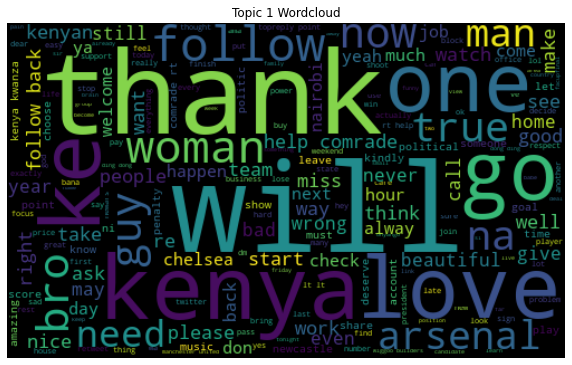

In [ ]:
# topic two

topic2 = df[df['topic']==2]
all_words = ' '.join(twts for twts in topic2['tweet_text'])

text_cloud = wordcloud.WordCloud(height=300,width=500,random_state=10,max_font_size=110).generate(all_words)

plt.figure(figsize=(10,8))
plt.title('Topic 1 Wordcloud')
plt.imshow(text_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

## 2. BERTopic
BERTopic is a topic modeling technique that leverages hugs transformers and c-TF-IDF to create dense clusters allowing for easily interpretable topics whilst keeping important words in the topic descriptions.

BERTopic supports guided, (semi-) supervised, and dynamic topic modeling. It even supports visualizations similar to LDAvis!

In [ ]:
# install the models

!pip install bertopic[gensim] bertopic[spacy]

     |████████████████████████████████| 58 kB 4.8 MB/s 
     |████████████████████████████████| 88 kB 4.8 MB/s 
     |████████████████████████████████| 79 kB 5.9 MB/s 
     |████████████████████████████████| 5.2 MB 63.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 24.1 MB 10.0 MB/s 
     |████████████████████████████████| 4.2 MB 68.3 MB/s 
     |████████████████████████████████| 1.2 MB 25.5 MB/s 
     |████████████████████████████████| 84 kB 3.0 MB/s 
     |████████████████████████████████| 636 kB 56.7 MB/s 
     |████████████████████████████████| 6.6 MB 58.9 MB/s 
     |████████████████████████████████| 1.1 MB 54.9 MB/s 
     |████████████████████████████████| 6.2 MB 53.3 MB/s 
     |████████████████████████████████| 660 kB 52.1 MB/s 
     |████████████████████████████████| 457 kB 33.4 MB/s 
     |████████████████████████████████| 42 kB 786 kB/s 
     |███████

In [ ]:
from bertopic import BERTopic

# prepare the tweets for topic modelling
timestamps = df.date_time.to_list()
tweets = df.tweet_text.to_list()

topic_model = BERTopic(verbose=True)
topics, probs = topic_model.fit_transform(tweets)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Batches:   0%|          | 0/436 [00:00<?, ?it/s]

2022-05-22 23:43:34,853 - BERTopic - Transformed documents to Embeddings
2022-05-22 23:44:08,981 - BERTopic - Reduced dimensionality
2022-05-22 23:44:09,831 - BERTopic - Clustered reduced embeddings


In [ ]:
freq = topic_model.get_topic_info()
freq.head(15)

,Topic,Count,Name
0,-1,5594,-1_and_to_be_in
1,0,501,0_kenya_nairobi_kenyans_kenyan
2,1,405,1_na_ni_kama_ya
3,2,264,2_gloriousendtimeword_crippleswalkingglobally_...
4,3,141,3_woman_lt_lady_wife
5,4,133,4_music_song_album_kendrick
6,5,106,5_tweet_twitter_retweet_tweep
7,6,105,6_pay_bank_finance_bill
8,7,99,7_ruto_william_rutodecides_mate
9,8,91,8_eat_cook_chicken_tea


In [ ]:
# visualize topics
topic_model.visualize_topics()

In [ ]:
# visualize hierarchy

topic_model.visualize_hierarchy()

In [ ]:
# visualize as a barchart

topic_model.visualize_barchart()

In [ ]:
# visualize the topics overtime

topics_over_time = topic_model.topics_over_time(tweets, topics, timestamps, nr_bins=20)
topic_model.visualize_topics_over_time(topics_over_time)

14it [00:05,  2.54it/s]


## 3 Conclusion
The BERTopic, an embedding-based model, performs better than LDA in grouping similar topics. 
There are minimal overlaps for the first three topics in LDA, and they are accurately classified.